In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train-Copy1.csv')
test=pd.read_csv("titanic_test-Copy1.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

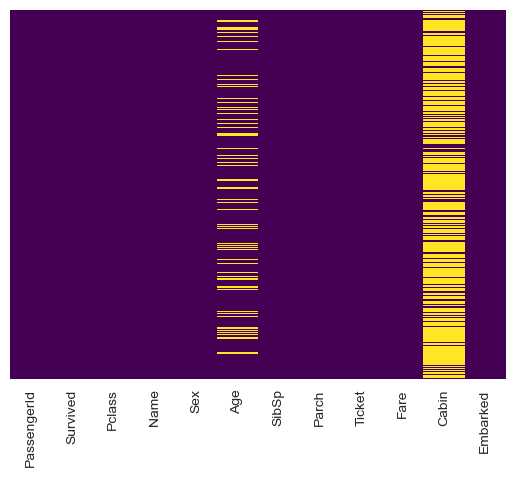

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #gives you a heat map of all true and false values

<Axes: xlabel='Survived', ylabel='count'>

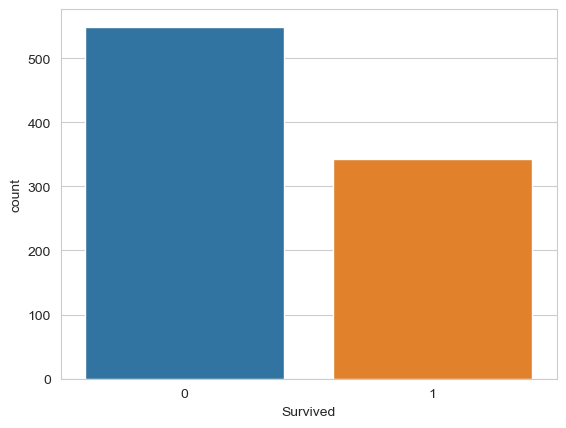

In [7]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

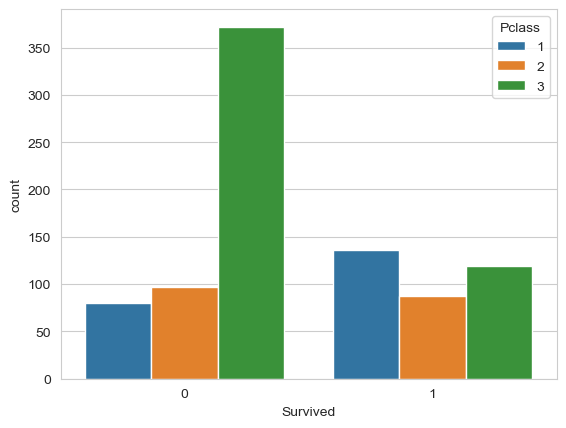

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass')

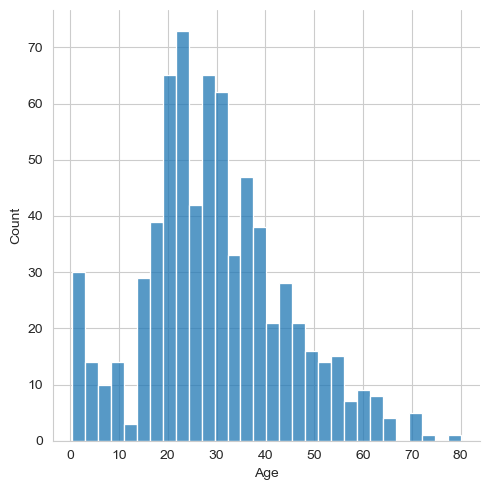

In [9]:
sns.displot(train['Age'].dropna(),bins=30)

<Axes: ylabel='Frequency'>

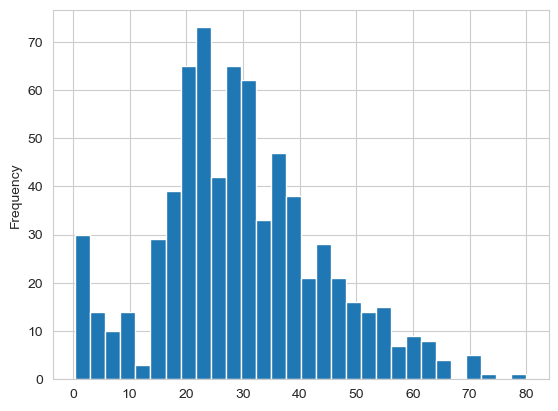

In [10]:
train['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

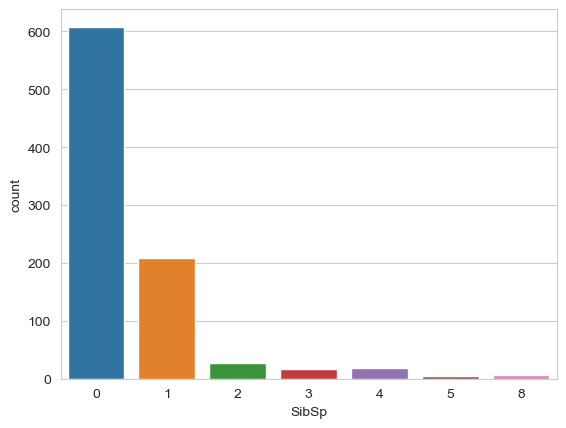

In [11]:
sns.countplot(x='SibSp',data=train)

<Axes: ylabel='Frequency'>

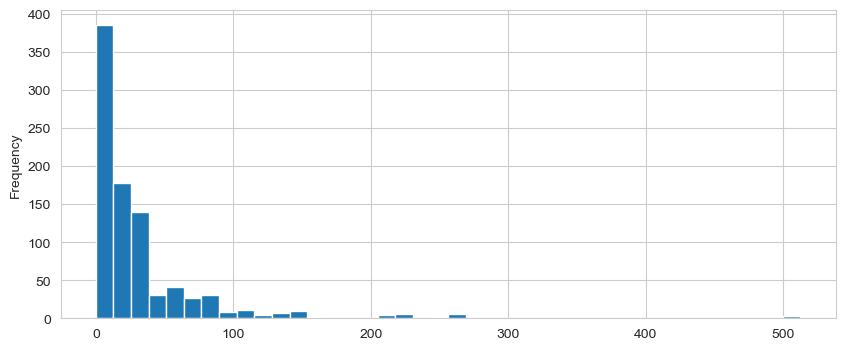

In [12]:
train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist',bins=40) #interactive plot

<Axes: xlabel='Pclass', ylabel='Age'>

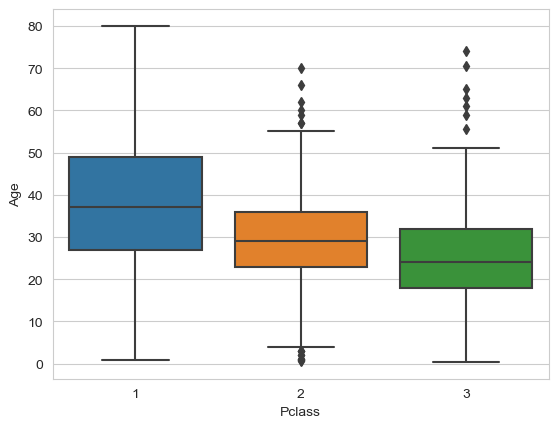

In [15]:
plt.Figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [16]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return train[train['Pclass']==1]['Age'].dropna().mean()
        elif Pclass==2:
            return train[train['Pclass']==2]['Age'].dropna().mean()
        else:
            return train[train['Pclass']==3]['Age'].dropna().mean()
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)#filling in values by average in class

<Axes: >

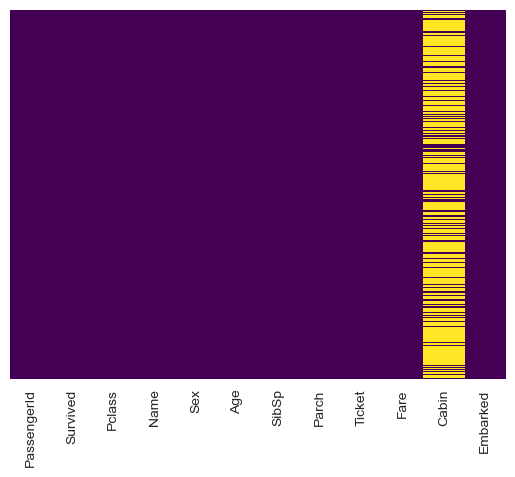

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #no null values in age

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [95]:
train.dropna(inplace=True) #drops the one embarked null value

**the sex and embarked column needs to be in integer of similar format for the algorithm to understand
so we create a new dummy variable column**

In [96]:
sex=pd.get_dummies(train['Sex'],drop_first=True) #drop first makes that only one column is kept
# if you keep both then you will have perfect predictors of each other whihc will lead to multiple colinearity issues

In [97]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [98]:
train=pd.concat([train,sex,embark],axis=1) 

In [104]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train.drop(['Sex','Name','Ticket','Embarked','PassengerId'],inplace=True,axis=1) #sex and embarked have dummies
# ticket and name are text data
#passenger id is just index

** Pclass is also a categorical column you can use dummies for that also this is an assignment **

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

In [113]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [117]:
X=train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y=train['Survived']

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [122]:
logmod=LogisticRegression(max_iter=10000)

In [123]:
logmod.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [124]:
predictions=logmod.predict(X_test)

In [137]:
print(sklearn.metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [139]:
print(sklearn.metrics.confusion_matrix(y_test,predictions))

[[150  13]
 [ 31  73]]
